In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import librosa
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to dataset
data_dir = "/content/drive/My Drive/silent_spp/"
speakers = ["Speaker_1", "Speaker_2", "Speaker_3"]

In [ ]:
import librosa
import os
import soundfile as sf  # To save audio files

# Define the dataset path
data_dir = "/content/drive/My Drive/silent_spp/"
speakers = ["Speaker_1", "Speaker_2", "Speaker_3"]
output_dir = "/content/drive/My Drive/silent_spp_downsampled/"  # Output directory for resampled audio

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function for downsampling audio
def downsample_audio(file_path, target_sr=22050):
    # Load audio file and original sample rate
    audio, sr = librosa.load(file_path, sr=None)
    # Resample to target sample rate
    audio_resampled = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
    return audio_resampled, target_sr

# Loop through specified speakers and their audio files
for speaker in speakers:
    speaker_path = os.path.join(data_dir, speaker)
    if os.path.isdir(speaker_path):
        print(f"Processing files for {speaker}...")
        # Create a subdirectory for each speaker in the output directory
        speaker_output_dir = os.path.join(output_dir, speaker)
        os.makedirs(speaker_output_dir, exist_ok=True)

        for file_name in os.listdir(speaker_path):
            if file_name.endswith(".wav"):
                file_path = os.path.join(speaker_path, file_name)
                # Downsample the audio file
                audio_resampled, target_sr = downsample_audio(file_path)

                # Save the resampled audio to the output directory
                output_file_path = os.path.join(speaker_output_dir, file_name)
                sf.write(output_file_path, audio_resampled, target_sr)
                print(f"Processed {file_name} in {speaker} - New Sample Rate: {target_sr}, saved to {output_file_path}")

Processing files for Speaker_1...
Processed 999.1.wav in Speaker_1 - New Sample Rate: 22050, saved to /content/drive/My Drive/silent_spp_downsampled/Speaker_1/999.1.wav
Processed 919.1.wav in Speaker_1 - New Sample Rate: 22050, saved to /content/drive/My Drive/silent_spp_downsampled/Speaker_1/919.1.wav
Processed 920.1.wav in Speaker_1 - New Sample Rate: 22050, saved to /content/drive/My Drive/silent_spp_downsampled/Speaker_1/920.1.wav
Processed 922.1.wav in Speaker_1 - New Sample Rate: 22050, saved to /content/drive/My Drive/silent_spp_downsampled/Speaker_1/922.1.wav
Processed 921.1.wav in Speaker_1 - New Sample Rate: 22050, saved to /content/drive/My Drive/silent_spp_downsampled/Speaker_1/921.1.wav
Processed 924.1.wav in Speaker_1 - New Sample Rate: 22050, saved to /content/drive/My Drive/silent_spp_downsampled/Speaker_1/924.1.wav
Processed 923.1.wav in Speaker_1 - New Sample Rate: 22050, saved to /content/drive/My Drive/silent_spp_downsampled/Speaker_1/923.1.wav
Processed 927.1.wav i

Extracting MFCCs for Speaker_1...
Extracted MFCCs for 1010.1.wav - Shape: (13, 100)
Extracted MFCCs for 1012.1.wav - Shape: (13, 100)
Extracted MFCCs for 1015.1.wav - Shape: (13, 100)
Extracted MFCCs for 1011.1.wav - Shape: (13, 100)
Extracted MFCCs for 1013.1.wav - Shape: (13, 100)
Extracted MFCCs for 1014.1.wav - Shape: (13, 100)
Extracted MFCCs for 1017.1.wav - Shape: (13, 100)
Extracted MFCCs for 1018.1.wav - Shape: (13, 100)
Extracted MFCCs for 1019.1.wav - Shape: (13, 100)
Extracted MFCCs for 1016.1.wav - Shape: (13, 100)
Extracted MFCCs for 1020.1.wav - Shape: (13, 100)
Extracted MFCCs for 1022.1.wav - Shape: (13, 100)
Extracted MFCCs for 1021.1.wav - Shape: (13, 100)
Extracted MFCCs for 1024.1.wav - Shape: (13, 100)
Extracted MFCCs for 1023.1.wav - Shape: (13, 100)
Extracted MFCCs for 1027.1.wav - Shape: (13, 100)
Extracted MFCCs for 1026.1.wav - Shape: (13, 100)
Extracted MFCCs for 1025.1.wav - Shape: (13, 100)
Extracted MFCCs for 1029.1.wav - Shape: (13, 100)
Extracted MFCCs 

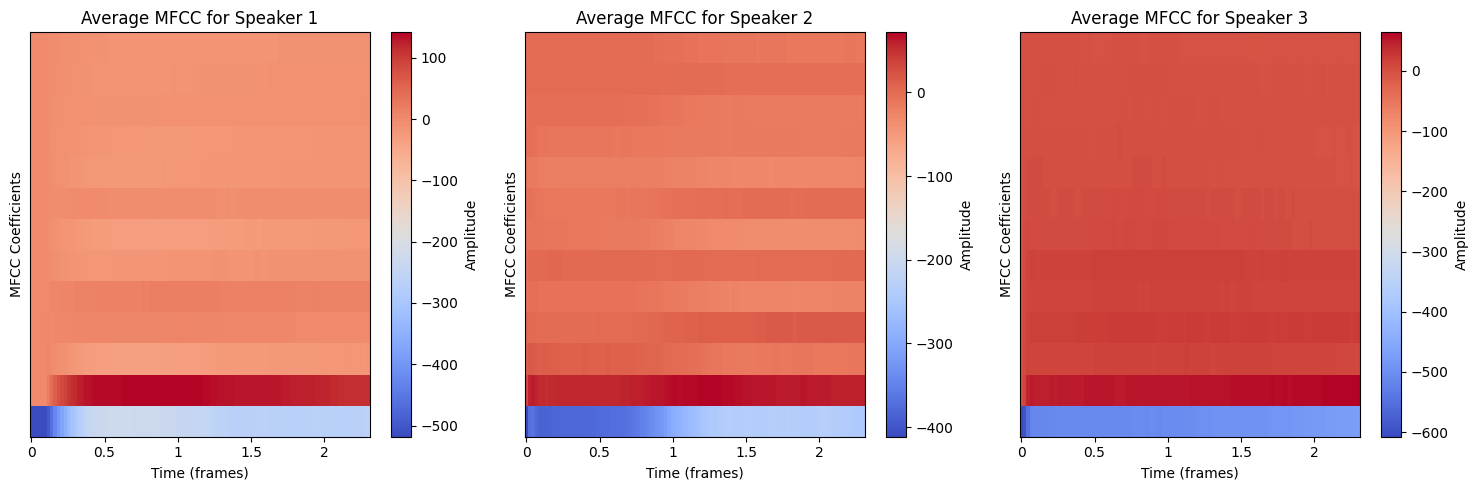

In [ ]:
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import numpy as np

# Function to extract MFCCs
def extract_mfcc(audio, sr, n_mfcc=13):
    # Compute MFCCs with specified number of coefficients
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return mfccs

# Define the target number of time frames for padding/truncating
max_len = 100  # Maximum number of time frames

# Store results in a dictionary for all speakers
mfcc_data = {}

# Loop through speakers and process their audio files
for speaker in speakers:
    speaker_path = os.path.join(output_dir, speaker)
    if os.path.isdir(speaker_path):
        print(f"Extracting MFCCs for {speaker}...")
        speaker_mfccs = []  # Store MFCCs for this speaker
        for file_name in os.listdir(speaker_path):
            if file_name.endswith(".wav"):
                file_path = os.path.join(speaker_path, file_name)
                # Load audio file
                audio, sr = librosa.load(file_path, sr=22050)  # Assuming audio is already downsampled
                # Extract MFCCs
                mfccs = extract_mfcc(audio, sr)

                # Pad or truncate MFCCs to the fixed number of time frames (max_len)
                if mfccs.shape[1] < max_len:
                    # Pad with zeros if MFCC has fewer time frames
                    mfcc_padded = np.pad(mfccs, ((0, 0), (0, max_len - mfccs.shape[1])), mode='constant')
                else:
                    # Truncate if MFCC has more time frames
                    mfcc_padded = mfccs[:, :max_len]

                speaker_mfccs.append(mfcc_padded)
                print(f"Extracted MFCCs for {file_name} - Shape: {mfcc_padded.shape}")

        # Calculate the average MFCCs across all files for this speaker
        avg_mfcc = np.mean(np.array(speaker_mfccs), axis=0)

        # Add to the main dictionary
        mfcc_data[speaker] = avg_mfcc

# Plot the average MFCCs for all speakers
plt.figure(figsize=(15, 5))

# Plot for Speaker 1
plt.subplot(1, 3, 1)
librosa.display.specshow(mfcc_data["Speaker_1"], sr=22050, x_axis='time', cmap='coolwarm')
plt.colorbar(label='Amplitude')
plt.title('Average MFCC for Speaker 1')
plt.xlabel('Time (frames)')
plt.ylabel('MFCC Coefficients')

# Plot for Speaker 2
plt.subplot(1, 3, 2)
librosa.display.specshow(mfcc_data["Speaker_2"], sr=22050, x_axis='time', cmap='coolwarm')
plt.colorbar(label='Amplitude')
plt.title('Average MFCC for Speaker 2')
plt.xlabel('Time (frames)')
plt.ylabel('MFCC Coefficients')

# Plot for Speaker 3
plt.subplot(1, 3, 3)
librosa.display.specshow(mfcc_data["Speaker_3"], sr=22050, x_axis='time', cmap='coolwarm')
plt.colorbar(label='Amplitude')
plt.title('Average MFCC for Speaker 3')
plt.xlabel('Time (frames)')
plt.ylabel('MFCC Coefficients')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

def extract_mfcc(file_path, n_mfcc=13, n_fft=2048, hop_length=512):
    y, sr = librosa.load(file_path, duration=5)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    if mfcc.shape[1] < 217:
        mfcc = np.pad(mfcc, ((0, 0), (0, 217 - mfcc.shape[1])), mode='constant')
    else:
        mfcc = mfcc[:, :217]
    return mfcc

In [ ]:
def load_data(Speaker_1, Speaker_2, Speaker_3):
    X, y = [], []

    for file in os.listdir(Speaker_1):
        if file.endswith('.wav'):
            mfcc = extract_mfcc(os.path.join(Speaker_1, file))
            X.append(mfcc)
            y.append('Speaker_1')

    for file in os.listdir(Speaker_2):
        if file.endswith('.wav'):
            mfcc = extract_mfcc(os.path.join(Speaker_2, file))
            X.append(mfcc)
            y.append('Speaker_2')

    for file in os.listdir(Speaker_3):
        if file.endswith('.wav'):
            mfcc = extract_mfcc(os.path.join(Speaker_3, file))
            X.append(mfcc)
            y.append('Speaker_3')

    return np.array(X), np.array(y)

In [ ]:
# Set paths to your dataset folders
Speaker_1 = '/content/drive/MyDrive/silent_spp_downsampled/Speaker_1'
Speaker_2 = '/content/drive/MyDrive/silent_spp_downsampled/Speaker_2'
Speaker_3 = '/content/drive/MyDrive/silent_spp_downsampled/Speaker_3'

In [ ]:
# Load the data
X, y = load_data(Speaker_1, Speaker_2, Speaker_3)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Reshape input data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(13, 217, 1), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - accuracy: 0.8273 - loss: 5.4216 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - accuracy: 0.9920 - loss: 0.0255 - val_accuracy: 1.0000 - val_loss: 7.4826e-05
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 17s 178ms/step - accuracy: 0.9987 - loss: 0.0034 - val_accuracy: 0.9974 - val_loss: 0.0069
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 173ms/step - accuracy: 0.9986 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 2.3008e-05
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 22s 184ms/step - accuracy: 1.0000 - loss: 8.9643e-05 - val_accuracy: 1.0000 - val_loss: 3.1623e-05
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - accuracy: 1.0000 - loss: 3.1042e-04 - val_accuracy: 1.0000 - val_loss: 7.8670e-06
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 29s 257ms/step - accuracy: 1.0000 - loss: 2.2884e-05 - val_accuracy: 1.0000 - val_loss: 7.7274e-06
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 33s 178ms/step - accuracy: 

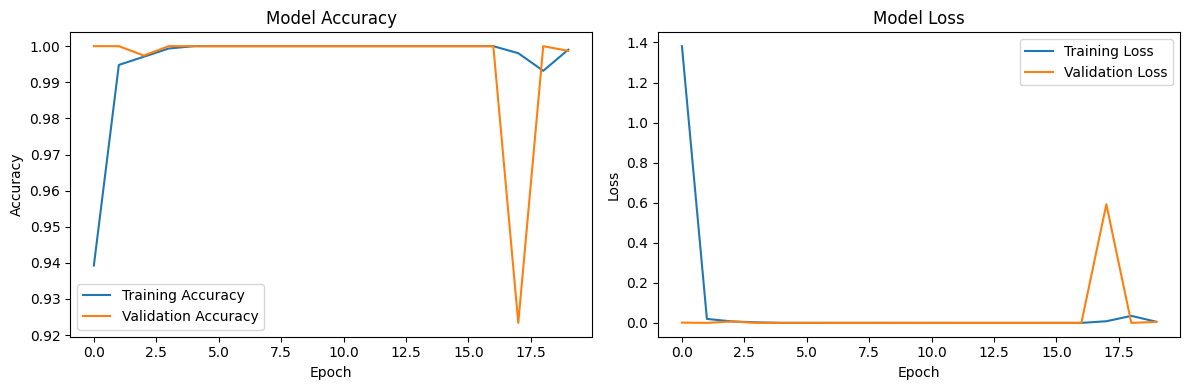

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Check test set
pred_test = model.predict(X_test)
y_pred = le.inverse_transform(np.argmax(pred_test, axis=1))
y_test_original = le.inverse_transform(np.argmax(y_test, axis=1))

df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred
df['Actual Labels'] = y_test_original

print(df.head(5))

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step
  Predicted Labels Actual Labels
0        Speaker_1     Speaker_1
1        Speaker_1     Speaker_1
2        Speaker_1     Speaker_1
3        Speaker_1     Speaker_1
4        Speaker_1     Speaker_1


In [ ]:
# Save the model for Telegram bot
model_save_path = '/content/drive/MyDrive/silent/voice_classification_model.h5'
save_model(model, model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to /content/drive/MyDrive/silent/voice_classification_model.h5


In [ ]:
!pip install python-telegram-bot tensorflow librosa numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.5/669.5 kB 9.7 MB/s eta 0:00:00


In [ ]:
!pip install python-telegram-bot --upgrade

In [ ]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install SpeechRecognition


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 10.2 MB/s eta 0:00:00


In [ ]:
!pip install SpeechRecognition
!apt-get install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install python-telegram-bot SpeechRecognition pydub


In [ ]:
import speech_recognition as sr  # For transcription
import os
from telegram import Update  # Import Update class
from telegram.ext import ContextTypes  # Import ContextTypes

async def classify_voice(update: Update, context: ContextTypes.DEFAULT_TYPE) -> None:
    voice = update.message.voice
    if voice:
        file = await context.bot.get_file(voice.file_id)
        file_path = f"{voice.file_id}.ogg"
        await file.download_to_drive(file_path)

        # Convert ogg to wav
        wav_path = f"{file_path}.wav"
        os.system(f"ffmpeg -i {file_path} {wav_path}")

        # Transcribe the voice message
        recognizer = sr.Recognizer()
        with sr.AudioFile(wav_path) as source:
            audio_data = recognizer.record(source)
            try:
                transcription = recognizer.recognize_google(audio_data)
                await update.message.reply_text(f"The transcription is: {transcription}")
            except sr.UnknownValueError:
                await update.message.reply_text("Sorry, I could not understand the audio.")
            except sr.RequestError as e:
                await update.message.reply_text(f"Could not request results from Google Speech Recognition service; {e}")

        # Clean up temporary files
        os.remove(file_path)
        os.remove(wav_path)
    else:
        await update.message.reply_text("Please send a voice message.")


In [ ]:
import os
import speech_recognition as sr
from google.colab import drive
from pydub import AudioSegment

# Mount Google Drive
drive.mount('/content/drive')

# Check the files in the directory
print(os.listdir('/content/drive/My Drive/silent_spp_downsampled'))

# Define the correct file path
file_path = '/content/drive/My Drive/silent_spp_downsampled/Speaker_1/1000.1.wav'  # Replace with the correct file

# Initialize the recognizer
recognizer = sr.Recognizer()

# Transcription function
def transcribe_audio(file_path, language="ru-RU"):
    try:
        with sr.AudioFile(file_path) as source:
            recognizer.adjust_for_ambient_noise(source, duration=1)
            print("Listening to audio...")
            audio = recognizer.record(source)

        print("Transcribing audio...")
        transcription = recognizer.recognize_google(audio, language=language)
        return transcription
    except FileNotFoundError:
        return "Error: The specified audio file was not found."
    except sr.UnknownValueError:
        return "Error: Google Speech Recognition could not understand the audio."
    except sr.RequestError as e:
        return f"Error: Could not request results from Google Speech Recognition service; {e}"

# Split and test transcription on smaller chunks
audio = AudioSegment.from_file(file_path)
chunk = audio[:10000]  # First 10 seconds
chunk.export("chunk.wav", format="wav")

chunk_path = "/content/chunk.wav"
result = transcribe_audio(chunk_path, language="ru-RU")
print("Transcription of Chunk:", result)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Speaker_1', 'Speaker_2', 'Speaker_3']
Listening to audio...
Transcribing audio...
Transcription of Chunk: закат на Океане


In [ ]:
import os
import numpy as np
import librosa
import speech_recognition as sr
from pydub import AudioSegment
from telegram import Update
from telegram.ext import Application, CommandHandler, MessageHandler, filters, ContextTypes
from tensorflow.keras.models import load_model
from google.colab import drive
import nest_asyncio
import asyncio

# Apply the nest_asyncio patch
nest_asyncio.apply()

# Load the saved model for voice classification
model = load_model('/content/drive/MyDrive/silent/voice_classification_model.h5')

# Initialize the recognizer for transcription
recognizer = sr.Recognizer()

# Mount Google Drive to access files
drive.mount('/content/drive')

# Extract MFCC features for speaker classification
def extract_mfcc(file_path, n_mfcc=13, n_fft=2048, hop_length=512):
    y, sr = librosa.load(file_path, duration=5)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    if mfcc.shape[1] < 217:
        mfcc = np.pad(mfcc, ((0, 0), (0, 217 - mfcc.shape[1])), mode='constant')
    else:
        mfcc = mfcc[:, :217]
    return mfcc

# Transcription function using SpeechRecognition
def transcribe_audio(file_path, language="ru-RU"):
    try:
        with sr.AudioFile(file_path) as source:
            recognizer.adjust_for_ambient_noise(source, duration=1)
            print("Listening to audio...")
            audio = recognizer.record(source)
        print("Transcribing audio...")
        transcription = recognizer.recognize_google(audio, language=language)
        return transcription
    except FileNotFoundError:
        return "Error: The specified audio file was not found."
    except sr.UnknownValueError:
        return "Error: Google Speech Recognition could not understand the audio."
    except sr.RequestError as e:
        return f"Error: Could not request results from Google Speech Recognition service; {e}"

# Handler for /start command
async def start(update: Update, context: ContextTypes.DEFAULT_TYPE) -> None:
    await update.message.reply_text('Welcome! Send me a voice message or upload a WAV file to classify or transcribe.')

# Handler for receiving voice messages
async def classify_voice(update: Update, context: ContextTypes.DEFAULT_TYPE) -> None:
    voice = update.message.voice
    if voice:
        file = await context.bot.get_file(voice.file_id)
        file_path = f"{voice.file_id}.ogg"
        await file.download_to_drive(file_path)

        # Convert ogg to wav
        os.system(f"ffmpeg -i {file_path} {file_path}.wav")
        wav_path = f"{file_path}.wav"

        # Extract MFCC features
        mfcc = extract_mfcc(wav_path)
        mfcc = mfcc.reshape(1, mfcc.shape[0], mfcc.shape[1], 1)

        # Make prediction
        prediction = model.predict(mfcc)
        result = "Speaker_1" if prediction[0][0] > prediction[0][1] and prediction[0][0] > prediction[0][2] else ("Speaker_2" if prediction[0][1] > prediction[0][2] else "Speaker_3")

        await update.message.reply_text(f"The voice is classified as: {result}")

        # Transcribe the audio
        transcription = transcribe_audio(wav_path)
        await update.message.reply_text(f"Transcription: {transcription}")

        # Clean up temporary files
        os.remove(file_path)
        os.remove(wav_path)
    else:
        await update.message.reply_text("Please send a voice message.")

# Handler for receiving WAV file uploads
async def classify_wav(update: Update, context: ContextTypes.DEFAULT_TYPE) -> None:
    document = update.message.document
    if document and document.file_name.endswith('.wav'):
        file = await context.bot.get_file(document.file_id)
        file_path = f"{document.file_id}.wav"
        await file.download_to_drive(file_path)

        # Extract MFCC features
        mfcc = extract_mfcc(file_path)
        mfcc = mfcc.reshape(1, mfcc.shape[0], mfcc.shape[1], 1)

        # Make prediction
        prediction = model.predict(mfcc)
        result = "Speaker_1" if prediction[0][0] > prediction[0][1] and prediction[0][0] > prediction[0][2] else ("Speaker_2" if prediction[0][1] > prediction[0][2] else "Speaker_3")

        await update.message.reply_text(f"The voice is classified as: {result}")

        # Transcribe the audio
        transcription = transcribe_audio(file_path)
        await update.message.reply_text(f"Transcription: {transcription}")

        # Clean up temporary files
        os.remove(file_path)
    else:
        await update.message.reply_text("Please upload a WAV file.")

# Main function to start the bot
async def main() -> None:
    # Use input() to securely input your bot token
    token = input("Enter your bot token: ")
    application = Application.builder().token(token).build()

    # Add handlers
    application.add_handler(CommandHandler("start", start))
    application.add_handler(MessageHandler(filters.VOICE, classify_voice))
    application.add_handler(MessageHandler(filters.Document.FileExtension("wav"), classify_wav))

    # Start the bot
    await application.run_polling(stop_signals=None)

# Run the main function
await main()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Listening to audio...
Transcribing audio...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Listening to audio...
Transcribing audio...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Listening to audio...
Transcribing audio...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Listening to audio...
Transcribing audio...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Listening to audio...
Transcribing audio...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Listening to audio...
Transcribing audio...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Listening to audio...
Transcribing audio...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Listening to audio...
Transcribing audio...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Listening to audio...
Transcribing audio...
